# First Analysis

### Importing all needed packages

In [473]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
from tqdm import tqdm 

### Mechanism to hidden some words from analysis.

In [474]:
# SHOW_USELESS_WORDS = True
SHOW_USELESS_WORDS = False

In [475]:
uselessWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é',
    'que'
}
# uselessWords

### Loading into a dataframe the content of the dataset (CSV file)

In [476]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [477]:
len(rawDf)

72777

### Some manipulation to the strings.

- lower case
- replace some symbols

In [478]:
df = rawDf['review_text'].str.lower()
df.head()

0    sabe todos aqueles livros que ensinam você a c...
1    ensinamentos que eu tive quando li o livro:1. ...
2    sucinto livro de parábolas, o homem mais rico ...
3    de forma clara traz ensinamentos sobre educaçã...
4    o livro o homem mais rico da babilônia está fa...
Name: review_text, dtype: object

In [479]:
df[1]

'ensinamentos que eu tive quando li o livro:1. primeiro pague a si mesmo e depois aos outros.“uma parte de todos os seus ganhos pertencem exclusivamente a você.”quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. no livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. as outras 9 moedas você pode gastar. mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. gastar com necessidades, e não com desejos.precisamos gastar menos do que ganhamos.2. controle os seus gastos. muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. por isso, precisamos saber exatamente no que gastamos. é necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. multiplique o seu dinheiro.depois que você consegui

In [480]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

### Creating a list with all unique words to use further.

In [ ]:
# For time counting
startTime = time.time()

allWords = list()
words = list()

for review in df:
    
#     print(review)
    rawWords = str(review).split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_USELESS_WORDS:
    
    for word in words:
        if word in uselessWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

### Total of unique words.

In [ ]:
print( 'List size: {}'.format( len(allWords) ) )

### Build a word cloud with all unique words.

In [ ]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_USELESS_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = uselessWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Seeing the words and each total in a table way.

In [ ]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = str(review).split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_USELESS_WORDS) and (word in uselessWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

In [ ]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

In [ ]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

# Second Analysis

#### Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.

#### Good tutorials and other texts

- Tutorial: Text Classification in Python Using spaCy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

## Importing all needed packages

#### Command to install **spaCy** package: ***pip install spacy***

In [1180]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import spacy
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from gensim.models import LdaModel, LdaMulticore
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
import seaborn as sns
import re
from pprint import pprint

## Installing and loading the Portuguese pipeline.
#### To install Portuguese pipeline by command line, type: *python -m spacy download pt_core_news_lg*
#### See more on: https://spacy.io/models/pt#pt_core_news_lg


In [1181]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [1182]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [1183]:
df = rawDf
df.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


## Some values in the *review_text* column are *nan* so I changed the values to an empty string to avoid breaking the program when reading each item to extract the sentences.

One example:

|book_id|review_id|review_rating|review_title|review_text|
|:------|:------:|:------:|:------|:------:|
|8547000240|R1QX38W7D6QOQ4|5<!-- .element: style="text-align:center;" -->|livro maravilhoso, ainda estou acabando de ler mais posso afirma que e espetacular.|nan|

In [1184]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [1185]:
df = rawDf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72777 entries, 0 to 72776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        72777 non-null  int64 
 1   review_id      72777 non-null  object
 2   review_rating  72777 non-null  object
 3   review_title   72700 non-null  object
 4   review_text    72774 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [1186]:
df['review_text'] = df['review_text'].fillna('')

In [1187]:
df['review_text'].isnull().values.any()

False

In [1188]:
reviewPosition = 1

In [1189]:
df.iloc[reviewPosition]

book_id                                                 8595081530
review_id                                           R3KC0ZLPQX85LT
review_rating                                                    5
review_title                                       Livro excelente
review_text      Ensinamentos que eu tive quando li o livro:1. ...
Name: 1, dtype: object

In [1190]:
doc = nlp( u''.join(df.iloc[reviewPosition]['review_text']) )
doc

Ensinamentos que eu tive quando li o livro:1. Primeiro pague a si mesmo e depois aos outros.“Uma parte de todos os seus ganhos pertencem exclusivamente a você.”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. As outras 9 moedas você pode gastar. Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. Gastar com necessidades, e não com desejos.Precisamos gastar menos do que ganhamos.2. Controle os seus gastos. Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. Por isso, precisamos saber exatamente no que gastamos. É necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. Multiplique o seu dinheiro.Depois que você conseguir

In [1191]:
totalTokensToPrint = 30

print( f'Printing the first {totalTokensToPrint}th tokens:\n' )

for token in doc[0:totalTokensToPrint]:
    print( f'{token.text:{15}} {spacy.explain(token.pos_):{30}} {token.lemma_:{15}}' )

Printing the first 30th tokens:

Ensinamentos    noun                           Ensinamentos   
que             pronoun                        que            
eu              pronoun                        eu             
tive            verb                           ter            
quando          subordinating conjunction      quando         
li              verb                           ler            
o               determiner                     o              
livro:1         noun                           livro:1        
.               punctuation                    .              
Primeiro        adverb                         Primeiro       
pague           verb                           pagar          
a               adposition                     o              
si              pronoun                        si             
mesmo           adverb                         mesmo          
e               coordinating conjunction       e              
depois          adverb

In [1192]:
for sentence in doc.sents:
    
    print( f'{sentence}' )
    print( f'--- Sentence size: {len(sentence)}' )
    print()

Ensinamentos que eu tive quando li o livro:1.
--- Sentence size: 9

Primeiro pague a si mesmo e depois aos outros.
--- Sentence size: 10

“Uma parte de todos os seus ganhos pertencem exclusivamente a você.
--- Sentence size: 12

”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar.
--- Sentence size: 16

No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma.
--- Sentence size: 18

As outras 9 moedas você pode gastar.
--- Sentence size: 8

Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter.
--- Sentence size: 16

Gastar com necessidades, e não com desejos.
--- Sentence size: 9

Precisamos gastar menos do que ganhamos.2.
--- Sentence size: 7

Controle os seus gastos.
--- Sentence size: 5

Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro.
--- Sentence size: 26

Por isso, precisamos saber exatamente no que ga

## Building a dataframe of sentences and building a new dataset of sentences.

In [1193]:
# # totalReviews = 10
# # totalReviews = 10000
# # i = 0

# # For time counting
# startTime = time.time()

# csvFile = './datasets/sentences.csv'
# csvDF = pd.DataFrame(columns = [
#     'book_id', 
#     'review_id', 
#     'review_rating', 
#     # 'review_title', 
#     'sentence'
# ]) 

# # for index in tqdm( range(0, totalReviews), desc="Progress", ncols=100 ):
# for index in tqdm( range(0, len(df)), desc="Progress", ncols=100 ):
    
#     review = df.iloc[index]
        
#     # print( f"- Book ID: {review['book_id']}" )
#     # print( f"- Review ID: {review['review_id']}" )
#     # print( f"- Review Rating: {review['review_rating']}" )
#     # print( f"- Review Title: {review['review_title']}" )
#     # print( f"- Review Text: {review['review_text']}" )
#     # print()
    
#     doc = nlp( u''.join( review['review_text'] ) )
#     # print(doc[0])
#     # print()
    
#     # print( '- Sentences' )
#     # print()
    
#     for sentence in doc.sents:
    
#         # print( f'{sentence}' )
#         # print( f'--- Sentence size: {len(sentence)}' )
#         # print()
        
#         row = {
#             'book_id': review['book_id'],
#             'review_id': review['review_id'],
#             'review_rating': review['review_rating'],
#             # 'review_title': review['review_title'],
#             'sentence': sentence
#         }
#         csvDF.loc[ len(csvDF), csvDF.columns ] = row
        
#         # print(i)
#         # print( f"review_id: {review['review_id']}" )
#         # print(sentence)
#         # print()
        
#         # i = i + 1
    
#     # print('\n======================================= Another Review =======================================\n\n')
    
# csvDF.to_csv(
#     csvFile, 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )
# # print( csvDF )

# print('======================================================================')
# print('Finished')

# # For time counting
# endTime = time.time()
# elapsedTime = endTime - startTime
# print( f'Running Time: {elapsedTime / 60} minutes' )

## Loading the sentences of the CSV file.

In [1194]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [1195]:
df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...


In [1196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176751 entries, 0 to 176750
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        176751 non-null  int64 
 1   review_id      176751 non-null  object
 2   review_rating  176751 non-null  int64 
 3   sentence       176750 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


In [1197]:
df.iloc[0]['sentence']

'Sabe todos aqueles livros que ensinam você a criar uma agenda para controle de gastos contendo tudo que você gasta durante determinado período de tempo e que você nunca consegue terminar o tal método?'

In [1198]:
doc = nlp( df.iloc[0]['sentence'] )
tokens = [token.text for token in doc]
print(tokens)

['Sabe', 'todos', 'aqueles', 'livros', 'que', 'ensinam', 'você', 'a', 'criar', 'uma', 'agenda', 'para', 'controle', 'de', 'gastos', 'contendo', 'tudo', 'que', 'você', 'gasta', 'durante', 'determinado', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'consegue', 'terminar', 'o', 'tal', 'método', '?']


In [1199]:
tokens = [token.lemma_ for token in doc]
print(tokens)

['Sabe', 'todo', 'aquele', 'livro', 'que', 'ensinar', 'você', 'o', 'criar', 'umar', 'agendar', 'parir', 'controlo', 'de', 'gasto', 'conter', 'tudo', 'que', 'você', 'gasto', 'durante', 'determinar', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'conseguir', 'terminar', 'o', 'tal', 'método', '?']


## Analysis of top sentences

In [1200]:
df['sentence'].value_counts()

                                                                                1116
Muito bom                                                                        584
Recomendo.                                                                       561
!                                                                                514
Muito bom!                                                                       459
                                                                                ... 
Muito bom, fácil a leitura e bem diferente dos filmes hehehehe                     1
O Senhor do anéis completo.                                                        1
Gostei tanto que comprei em seguida o box                                          1
História muito cativante e divertida de se ler.                                    1
A poesia de  Amanda  é visceral ,intensa e tão próxima de todas as mulheres.       1
Name: sentence, Length: 138605, dtype: int64

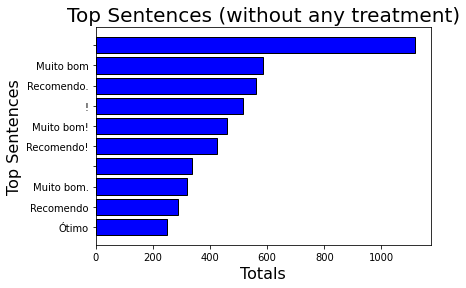

In [1201]:
topSentencesLimit = 10
topSentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = df['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (without any treatment)', fontsize=20 )
plt.show()

In [1202]:
def cleanSentence( sentence ):
    
    sentence = str( sentence )
    sentence = re.sub('[\,\.\!\?\%\'\(\)\,\-\_\“\”\●\♥\d\/\$\&\`\*\+\❞\°\–\…👏💪📸😁😍😘😚🙂🥰🥺❤🏻🏾💃💖😉😔😲✨💗💚🔝😊😕😻🧐]', '', sentence)
    sentence = re.sub('\bque\b|\bnos\b|\bde\b|\bem\b|\bcom\b|\bao\b|\btem\b|\bpessoas\b|\bmais\b', '', sentence)
    sentence = sentence.lower()
    
    return sentence

In [1203]:
sentences = df['sentence'].tolist()
cleanedSentences = [cleanSentence( sentence ) for sentence in sentences]
dfTopSentences = df
dfTopSentences['sentence'] = cleanedSentences
dfTopSentences['sentence'].head()

0    sabe todos aqueles livros que ensinam você a c...
1    ou daqueles que você termina a leitura sentind...
2    você não vai encontrar um setup milagroso ou a...
3    basicamente este livro conta verdades sobre o ...
4    mostra os detalhes de uma forma tão direta e b...
Name: sentence, dtype: object

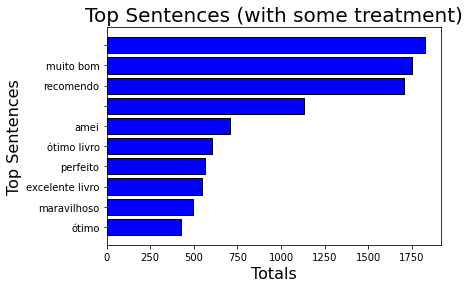

In [1204]:
topSentencesLimit = 10
topSentences = dfTopSentences['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = dfTopSentences['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (with some treatment)', fontsize=20 )
plt.show()

### Repeated Sentences

In [1205]:
total = len(dfTopSentences['sentence'])
values = dfTopSentences['sentence'].value_counts()[:total]
sentences = dfTopSentences['sentence'].value_counts()[:total].index

In [1206]:
repeatedSentences = list()
for i in range(0, len(sentences)):
    # print( f'{sentence[i]} - {values[i]}' )
    if values[i] > 1:
        repeatedSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(repeatedSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 11316
--------------------------

First 10 results
--------------------------

 - 1827
muito bom - 1749
recomendo - 1702
  - 1130
amei - 709
ótimo livro - 603
perfeito - 566
excelente livro - 547
maravilhoso - 498
ótimo - 426


Last 10 results
--------------------------

muito feliz com meu livríneo lindo - 2
é uma historia boa que vale sim a pena de ler mas para o meu gosto o visconde não me encantou como deveria ter encantado mas é muito bom kkkestou falando em relação aos comentários que aqui foram expressos - 2
bom bem embalado - 2
meu livro veio rasgado e só vim me dar conta ontem após abrir para minha leitura sinto que a história deve ser incrível mas me chateia o fato do livro ter vindo rasgado - 2
apesar de ser um enredo relativamente previsível a escrita é boa e envolvente - 2
venho com leves problema com um amassado na borda e um pequeno riscado na capa de um dos livros - 2
esse foi um dos títulos da série que menos gostei - 2
resenha de varios livros  - 2
a

### Unique Sentences

In [1207]:
uniqueSentences = list()
for i in range(0, len(sentences)):
    
    if values[i] == 1:
        uniqueSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(uniqueSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 121474
--------------------------

First 10 results
--------------------------

mas eu ainda queria um marcapagina desse - 1
já quero ler os próximos - 1
produto chegou bem antes do prazo veio em ótima qualidade sem nenhum problema e ainda por cima deram reembolso em parte do valor por conta da redução do preço pós lançamento - 1
o livro é super fluido de ler e a história é tão cativante quanto já sabemos  - 1
esse livro me fez rir e também me emocionou - 1
o único problema é que não veio o marcador - 1
sobre o livro simplesmente amei é fantastico - 1
apenas alguns erros de ortografias nos primeiros capítulos mas nada que seja um grande incômodo fora isso o livro é perfeito entrega muito rápidamuito antes do prazo - 1
não li ainda mas é lindo e veio em perfeito estado antes do prazo alem de estar muito barato - 1
rsrseu amei chegou bem antes do prazovaleu super a pena - 1


Last 10 results
--------------------------

o poster mais perfeito ainda amei - 1
estava com mu

### A good question to future investigation:

**We can relate these top sentences with users? Maybe the top sentences belongs to the same group of people...**

**But we need to observe privacy before this...**

## Building a Bag of Words (BoW) with the words of the sentences.

#### Get only unique sentences to analyse

In [1208]:
tempDf = df

In [1209]:
tempDf['sentence'] = [cleanSentence(sentence) for sentence in tempDf['sentence']]

In [1210]:
len(tempDf)

176751

In [1211]:
uniqueSentencesList = [ item['sentence'] for item in uniqueSentences ]
# uniqueSentencesList

In [1212]:
tempDf = tempDf[ tempDf[ 'sentence' ].isin(uniqueSentencesList) ]

In [1213]:
len(tempDf)

121474

In [1214]:
tempDf

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,você não vai encontrar um setup milagroso ou a...
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...
...,...,...,...,...
176746,8544106595,RQUIEDP9RU8GN,5,uma obra que toca nos seus maiores pesadelosma...
176747,8544106595,R28THF88K7GE5S,5,levepesadofortesuavelindofeio e todas as fases...
176748,8544106595,R28THF88K7GE5S,5,lindolindolindo
176749,8544106595,R28THF88K7GE5S,5,ameicomibebi cada palavra


#### Total of selected in partialDf

In [1215]:
linesTotal = 5000

In [1216]:
# partialDf = tempDf.iloc[ :linesTotal ]
partialDf = tempDf.sample( linesTotal )

In [1217]:
partialDf.head()

,book_id,review_id,review_rating,sentence
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...


In [1218]:
partialDf.tail()

,book_id,review_id,review_rating,sentence
55255,8595084742,R29KVMFFHX6LJQ,5,ótimo livro chegou antes do prazo produto de q...
118980,8532530788,R333BXDQ8K34AW,5,devorou em dias
43836,8501117684,ROFL0T3E80NE9,4,gostei da forma que a história é contada alter...
77599,6555650001,R1FEZOI9K6BC8O,5,veio em ótimo estado e antes do prazo a histór...
51974,8595084742,R3K2JZ728PH3UB,5,eu amo com todo o meu coração assim como o sen...


In [1219]:
partialDf.shape

(5000, 4)

#### Disable warnings

In [1220]:
import warnings
warnings.filterwarnings("ignore")

In [1221]:
def tokenizer( sentence ):
    
    doc = nlp( sentence )
    tokens = [token.lemma_ for token in doc]
    
    return tokens

### BoW - Sparse Matrix - Token Frequency

In [1222]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1))

dfBowTokenFrequency = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTokenFrequency.head(20)

,,,#,:,=,@abismosliterariosem,[,],aaaa,abalar,...,😃,😤,😫,😭,😸,🤍,🤍os,🤦,🤯,🥳
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1223]:
print( f'Number of columns: {len( dfBowTokenFrequency.columns)}' )

Number of columns: 5180


In [1224]:
# for item in dfBowTokenFrequency.columns:
#     print(item)

### WordCloud

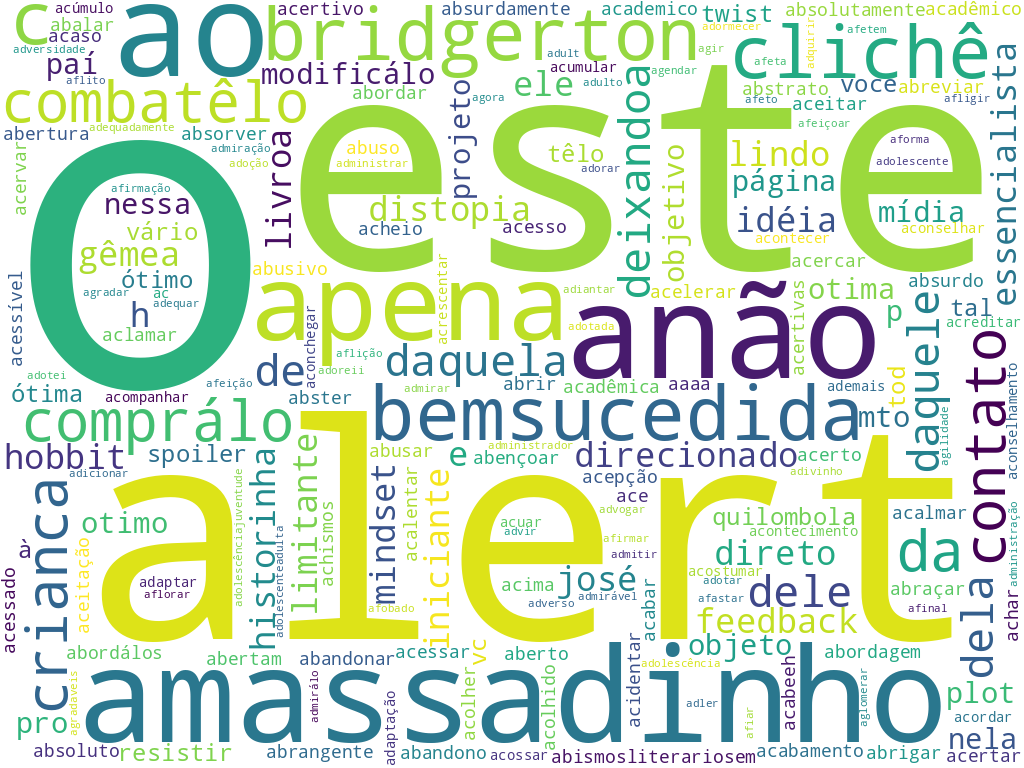

In [1225]:
wordsBowTokenFrequency = ','.join( list(dfBowTokenFrequency.columns) )
wordcloud = WordCloud(
    background_color="white", 
    contour_width=3, 
    contour_color='steelblue',
    width=1024,
    height=768)
wordcloud.generate( wordsBowTokenFrequency )
wordcloud.to_image()

### BoW - Sparse Matrix - Binary

In [1226]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1),
    binary=True)

dfBowBinary = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowBinary.head(20)

,,,#,:,=,@abismosliterariosem,[,],aaaa,abalar,...,😃,😤,😫,😭,😸,🤍,🤍os,🤦,🤯,🥳
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1227]:
print( f'Number of columns: {len( dfBowBinary.columns)}' )

Number of columns: 5180


### BoW - Sparse Matrix - TF-IDF

#### https://www.kaggle.com/code/k4puneet/countvectorizer-tfidf-tutorial/notebook

In [1228]:
vectorizer = TfidfVectorizer( analyzer = tokenizer )

dfBowTFIDF = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTFIDF.head(20)

,,,#,:,=,@abismosliterariosem,[,],aaaa,abalar,...,😃,😤,😫,😭,😸,🤍,🤍os,🤦,🤯,🥳
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.298146,0.0,0.0,0.102629,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1229]:
print( f'Number of columns: {len( dfBowTFIDF.columns )}' )

Number of columns: 5180


### Total of clusters

In [1230]:
clustersTotal = 5

### Function: classReport

In [1231]:
def classReport( columnLabel, clustersTotal ):

    for i in range(0, clustersTotal):

        print( '===========================================================================' )
        print( f'Representation: {columnLabel} - class: {i}' )
        print( '===========================================================================' )
        print()

        dfClass = partialDf[ partialDf[ columnLabel ] == i ]

        display( dfClass.head(10) )
        print()

        print( f'Sentences by score from class {i}' )
        print( '====================================' )
        print( dfClass[ 'review_rating' ].value_counts().sort_index( ascending=False ) )
        print()

        print( f'Examples from class {i}' )
        print( '====================================' )
        print()

        if len( dfClass['sentence'] ) >= 5:
            sentencesClass = dfClass['sentence'].sample(5)
            for sentence in sentencesClass:
                print( sentence )
                print()
                print( '-----------------------------------' )
                print()
        else:
            for sentence in dfClass['sentence']:
                print( sentence )
                print()
                print( '-----------------------------------' )
                print()
                

        print( '###########################################################################' )
        print( '###########################################################################' )
        print( '###########################################################################' )
        print()

### K-Means - BoW - Sparse Matrix - Token Frequency

In [1232]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTokenFrequency )
kmeans

KMeans(n_clusters=5, random_state=0)

In [1233]:
kmeans.labels_

array([4, 2, 2, ..., 1, 4, 2], dtype=int32)

In [1234]:
kmeans.cluster_centers_

array([[ 7.13519313e-02,  5.36480687e-04,  2.14592275e-03, ...,
        -1.30104261e-18,  5.36480687e-04, -1.30104261e-18],
       [ 5.41666667e-01,  1.04166667e-02, -4.33680869e-19, ...,
         2.71050543e-20,  2.71050543e-20,  2.71050543e-20],
       [ 7.57166036e-02,  1.08166577e-03,  5.40832883e-04, ...,
         5.40832883e-04, -1.27393755e-18, -1.27393755e-18],
       [ 1.34551495e-01, -6.50521303e-19, -6.50521303e-19, ...,
         4.87890978e-19,  4.87890978e-19,  1.66112957e-03],
       [ 1.74872666e-01,  1.69779287e-03, -6.50521303e-19, ...,
         4.60785923e-19,  4.60785923e-19,  4.60785923e-19]])

In [1235]:
columnLabel = 'class__bow_token_frequency'

In [1236]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...,4
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...,2
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...,2
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...,0
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...,2


In [1237]:
partialDf[columnLabel].value_counts().sort_index()

0    1864
1      96
2    1849
3     602
4     589
Name: class__bow_token_frequency, dtype: int64

#### PCA

In [1238]:
pcaBowTokenFrequency = PCA( n_components=2 )
principalComponentsBowTokenFrequency = pcaBowTokenFrequency.fit_transform( dfBowTokenFrequency )
# principalComponentsBowTokenFrequency
# type(principalComponentsBowTokenFrequency)

In [1239]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowTokenFrequency:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

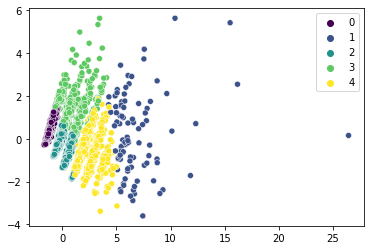

In [1240]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [1241]:
%%time
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowTokenFrequency )
mds.shape

CPU times: user 11min 47s, sys: 7min 23s, total: 19min 10s
Wall time: 8min 30s


(5000, 2)

In [1242]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

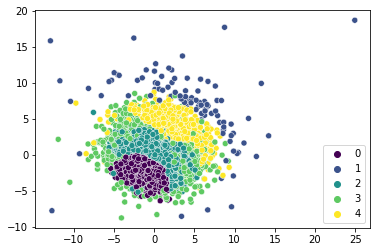

In [1243]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### TSNE

In [1244]:
%%time
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowTokenFrequency )
tsne.shape

CPU times: user 1min 43s, sys: 1.4 s, total: 1min 44s
Wall time: 27.6 s


(5000, 2)

In [1245]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

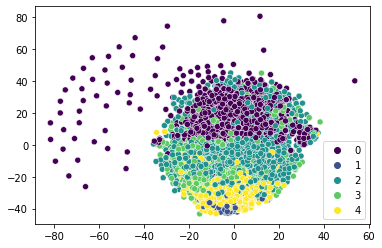

In [1246]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [1247]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_token_frequency - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...,0
118748,8532530788,R1N4OVPEFRMX69,5,eu achei muito bom para ler e aprender palavra...,0
129906,8501105732,R2GBLW0IFATBFP,5,esse livro muito muito bom mesmo,0
44040,8501117684,R1QI89Y99VTTBG,5,coho é uma autora incrível uma das minhas pref...,0
173803,8573020806,R3KT2EI8HK6L58,5,li e reli,0
145568,8576849941,R2SK1RCD7T0484,5,esse livro pode mudar sua vida se vc realmente...,0
19671,8584391509,R16SYQ1UPLST29,5,final surpreendente e história cativante,0
81618,8575422391,R16VEHKUW7HVBF,5,esse livro minha vida de verdade,0
8790,8550802751,R3LMQA5T25RY1T,2,mais um sucesso do marketing editorial,0
33096,6580309318,R2118QYOBZHJUV,5,simplesmente fantástico com um desfecho eu dir...,0



Sentences by score from class 0
5    1521
4     162
3      67
2      52
1      62
Name: review_rating, dtype: int64

Examples from class 0

gary chapman abre nossos olhos

-----------------------------------

amazon ta

-----------------------------------

muito satisfeito com tudo

-----------------------------------

quem leu acredito que sabe do que estou falando para quem não leu não quero dar spoiler

-----------------------------------

que muitas vezes algumas mulheres se submetem porque não conseguem sair

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_token_frequency - class: 1



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
122313,8551006754,R1L0H5TN5EX32A,4,as cores são vibrantes as ilustrações são bem ...,1
116883,8532530788,RTMESWFHHFBFS,5,na primeira vez que eu vi a foto dos livros de...,1
111269,8542209826,R2WQPKJJUMX10B,3,o livro é bom a estória é linda de partir o co...,1
46037,8539004119,R3VD4INDXWQ5W,5,o livro é divido em várias pequenas histórias ...,1
22621,8595083274,R1P93OULE6K7DN,3,a primeira parte é meio que uma auto ajuda mas...,1
15719,8568014003,RYJKDJC3I87RD,4,mas na segunda parte do livro na entrevista po...,1
138317,8565765482,RBWIF5S18PW0T,5,a entrega foi impecável o livro é esteticament...,1
8698,8550802751,R10JAFXXHNA4SF,4,o livro de jordan peterson apresenta ao mesmo ...,1
162442,8532649963,R1O6P6CMKPEE22,3,o conceito é interessante mas achei que o auto...,1
116145,8532530788,R28393POKGIRG1,5,para aqueles que estão em dúvida se vale a pen...,1



Sentences by score from class 1
5    65
4    12
3    12
2     4
1     3
Name: review_rating, dtype: int64

Examples from class 1

a forma como a clara escreve é muita fluída e te deixa bem imersa na história além disso como o livro é contado com capítulos alternados entre a raissa e a ayla você consegue se apegar as personagens e entender o lado de cada uma

-----------------------------------

o mundo é controlado pelos prateados seu sangue é poderoso são deuses cruéis com poderes inimagináveis os vermelhos são os comuns plebeus cuja única função é o trabalho pesado por ordem dos prateados aqueles que possuem o sangue vermelho precisam servir é de sua natureza ser oprimidos humilhados

-----------------------------------

tendo em vista que existem excelentes comentários aqui sobre o conteúdo do livro em si o meu comentário se resume a falar sobre a edição da editora auster um psicólogo no campo de concentração na tentativa de ajudar aqueles que buscam saber mais sobre a edição e a d

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...,2
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...,2
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...,2
62035,8546501459,RFWT8W4B9FN3C,5,escolhi essa classificação porque gostei muito...,2
84163,8543102146,R1UFNJ4VNE3VVX,5,para quem está perdido nesse mundo tão trivial...,2
25139,8595083274,R120V6YYVG6GLH,5,sobre os investimentos,2
17624,8584391509,R1OEPKNNPF9SP6,5,quando eu li o título e vi que ela se casou v...,2
47488,8539004119,R8SIGROKLUZGX,5,esclarece pontos relevantes sobre nossos hábit...,2
12357,8568014003,R3R290G8Q4M0JJ,5,lições poderosas e muitas vezes óbvias mas é o...,2
55331,8595084742,RY4HYVL4P382G,1,veio sem o pôster,2



Sentences by score from class 2
5    1417
4     237
3      90
2      38
1      67
Name: review_rating, dtype: int64

Examples from class 2

se você é iniciante vale a pena a leituracaso contrário existem livros melhores

-----------------------------------

cada poema carrega uma carga emocional gigantesca e é isso que o torna tão maravilhoso

-----------------------------------

a história merece o hype que teve muito bem construída e instigante

-----------------------------------

não sabia que a história é muito triste

-----------------------------------

nada a reclamar do livro e sim da entrega da amazon que foi péssima

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_token_frequency - class: 3



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
86570,8532606261,R6ZEEA8835J0W,4,bons terapeutas provavelmente se depararão com...,3
7266,8501112518,R2A1PVKFU667B2,5,enfim um livro para que você saia da sua zona ...,3
146299,8576849941,R1U00ROIZBXEYU,5,é um livro completo de um autor muito generoso...,3
60751,8574068012,R1J4J6XXWU4CR4,5,o livro é capaz de prender a atenção das crian...,3
47069,8539004119,R1J3PQ91MXYLHG,5,um livro que aborda suas formas de mudança de ...,3
140830,8576849941,R60JN77DLVNLF,2,a impressão é que ele apenas quis compartilhar...,3
56658,6555651059,R36RUSNMWFA56A,5,todos são ótimo apenas duque e eu e a caminho ...,3
71714,8555340896,R1J534IR1GNULP,5,a história é apaixonante sou suspeita para fal...,3
172997,8565765695,R2BL3YJWYEA4C4,4,é um clichê que a autora pegou e deu um uso qu...,3
71984,8555340896,R2E3XY18MS6X2V,5,o livro é bom e bastante leve apesar de tratar...,3



Sentences by score from class 3
5    431
4     95
3     42
2     12
1     22
Name: review_rating, dtype: int64

Examples from class 3

o conteúdo é fácil de se entender prático bons estudos de casos que comprovam as teorias dicas de procedimentos muito úteis

-----------------------------------

a narrativa do livro é uma das mais interessantes que li apesar de simples adorei ler um livro onde os poemas se complementam e juntos são uma história só

-----------------------------------

apêndices bastantes complexos e de difícil leitura por parte de pessoas que não lembre ou não saibam da histórico envolvido no livro

-----------------------------------

quem pensa enriquece só para quem acredita como eu que nós somos o que pensamos e somos frutos de nossa imaginação

-----------------------------------

iniciam assim uma conversa e descobrem que tem muito em comum principalmente com tanta facilidade de jorrarem as verdades nuas e cruas de suas vidas

-----------------------------------

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...,4
114854,8582892101,RGJUVRYAAMFS2,5,gostei bastante do livro o fundamento está em ...,4
29850,8584440739,R2MUH7GN8LN5HP,5,livro excelente esclarecedor ajuda os pais a c...,4
12047,8568014003,R3OQ15HI5XCY23,3,porém o livro é escrito em fora de um interrog...,4
73535,8571832641,R2O02TCI08ETT4,5,a entrega foi super rápida e o os livro chegou...,4
131317,8501105732,R2LWTD2TL1ONWD,4,além disso te faz refletir sobre a sua vida tr...,4
35752,8547000240,R26M4N8E21H8A6,1,basicamente a ideia central do livro se resume...,4
166462,8535932879,R2EVYYC7ZHJZT0,5,logo de cara djamila nos alerta que enxergarse...,4
40632,8543104335,R3D3FU34QMXACJ,5,este livre traz confronto e ilumina areas de n...,4
37570,8547000240,R2JUOZRIVZG1H7,3,como não sou da área da psicologia mas gosto m...,4



Sentences by score from class 4
5    410
4     88
3     52
2     18
1     21
Name: review_rating, dtype: int64

Examples from class 4

é menor do que parece e assim como os outros chegou com alguns amassados mínimos e o cuidado deveria ser dobrado na entrega

-----------------------------------

o avesso da pele terceiro romance de jeferson tenório e minha estreia com sua escrita trouxe aquele nó preso na garganta durante a leitura e tornouse uma  história arrebatadora e ao mesmo tempo provocadora pois contém elementos atuais e realistas

-----------------------------------

eu o tenho a um tempinho e toda vez que abro era exatamente o que eu precisava ler pro momento em específico

-----------------------------------

: a tradução não é das melhores mas ainda assim acho que vale muito a pena pelo conteúdo que é passado o livro chegou em perfeito estado e muito rápido como sempre

-----------------------------------

agora eu que tenho que ter o trabalho de ir nos correios para tentar

### K-Means - BoW - Sparse Matrix - Binary

In [1248]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowBinary )
kmeans

KMeans(n_clusters=5, random_state=0)

In [1249]:
kmeans.labels_

array([1, 1, 3, ..., 4, 1, 0], dtype=int32)

In [1250]:
kmeans.cluster_centers_

array([[ 5.99369085e-02,  1.05152471e-03,  1.05152471e-03, ...,
         7.58941521e-19,  7.58941521e-19,  7.58941521e-19],
       [ 7.86729858e-02,  1.89573460e-03,  3.14418630e-18, ...,
         9.47867299e-04,  7.86046575e-19,  7.86046575e-19],
       [ 6.00000000e-02,  6.89655172e-04,  2.06896552e-03, ...,
        -2.71050543e-20,  6.89655172e-04, -2.71050543e-20],
       [ 6.89206762e-02, -6.50521303e-19,  2.49366500e-18, ...,
         6.23416249e-19,  6.23416249e-19,  6.23416249e-19],
       [ 1.57419355e-01,  1.29032258e-03,  2.60208521e-18, ...,
         6.50521303e-19,  6.50521303e-19,  1.29032258e-03]])

In [1251]:
columnLabel = 'class__bow_binary'

In [1252]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...,4,1
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...,2,1
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...,2,3
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...,0,3
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...,2,1


In [1253]:
partialDf[columnLabel].value_counts().sort_index()

0     951
1    1055
2    1450
3     769
4     775
Name: class__bow_binary, dtype: int64

#### PCA

In [1254]:
pcaBowBinary = PCA( n_components=2 )
principalComponentsBowBinary = pcaBowBinary.fit_transform( dfBowBinary )
# principalComponentsBowBinary
# type(principalComponentsBowBinary)

In [1255]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowBinary:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

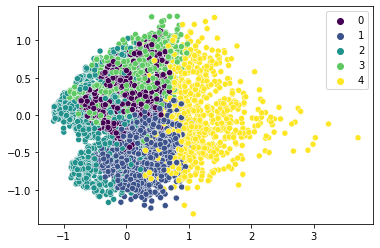

In [1256]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [1257]:
%%time
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowBinary )
mds.shape

CPU times: user 11min 40s, sys: 7min 20s, total: 19min 1s
Wall time: 8min 25s


(5000, 2)

In [1258]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

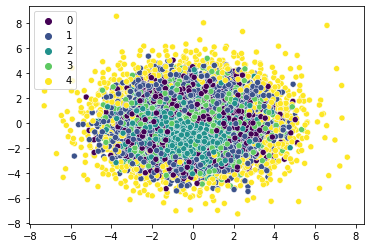

In [1259]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### TSNE

In [1260]:
%%time
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowBinary )
tsne.shape

CPU times: user 1min 49s, sys: 1.18 s, total: 1min 51s
Wall time: 28.7 s


(5000, 2)

In [1261]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

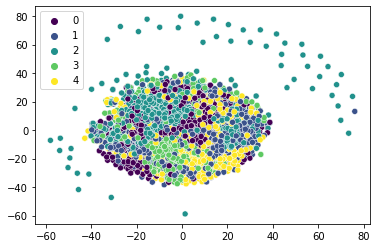

In [1262]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [1263]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_binary - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
25139,8595083274,R120V6YYVG6GLH,5,sobre os investimentos,2,0
55331,8595084742,RY4HYVL4P382G,1,veio sem o pôster,2,0
40685,8543104335,R1MJWGW91ASSOY,5,não li nem conheço o autor,2,0
21918,8595083274,RHKZ6OFWIHOB9,5,depois que iniciei a leitura fiz meu primeiro ...,2,0
117613,8532530788,R2N6IN47Q04QBM,5,foi o pontapé inicial para eu entrar no mundo ...,2,0
173026,8565765695,R2BL3YJWYEA4C4,4,os prateados conseguem se manter no poder porq...,2,0
166462,8535932879,R2EVYYC7ZHJZT0,5,logo de cara djamila nos alerta que enxergarse...,4,0
64989,8535909559,R1PK32J9RG0EB1,4,foi escrito a tanto tempo mas continua tão atual,2,0
53126,8595084742,RO9YIDJQRWZHX,5,realmente tolkien é tudo o que dizem em mais u...,2,0
73007,8555340896,RBA7645O4QO9F,5,quando li me vi na alya porque passei pela mes...,2,0



Sentences by score from class 0
5    710
4    132
3     47
2     22
1     40
Name: review_rating, dtype: int64

Examples from class 0

foi uma viagem no tempo nos modos de vida na labuta na determinação dos personagens

-----------------------------------

se você quer mudar como ser humano em todas as áreas da sua vida essa é um excelente manual

-----------------------------------

mas no geral adorei ler

-----------------------------------

faz bastante sentido o que ela escreve mas o tom apelativo fica um pouco massante

-----------------------------------

veio com a capa amassada

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_binary - class: 1



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...,4,1
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...,2,1
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...,2,1
84163,8543102146,R1UFNJ4VNE3VVX,5,para quem está perdido nesse mundo tão trivial...,2,1
17624,8584391509,R1OEPKNNPF9SP6,5,quando eu li o título e vi que ela se casou v...,2,1
47488,8539004119,R8SIGROKLUZGX,5,esclarece pontos relevantes sobre nossos hábit...,2,1
12357,8568014003,R3R290G8Q4M0JJ,5,lições poderosas e muitas vezes óbvias mas é o...,2,1
44040,8501117684,R1QI89Y99VTTBG,5,coho é uma autora incrível uma das minhas pref...,0,1
167793,8535932879,R3G28DXARIFBQ6,5,tempo tema pela profundidade do assunto e pelo...,2,1
78075,8543108683,R6EMZI551EQTR,5,o livro é muito interessante se você gosta e t...,2,1



Sentences by score from class 1
5    843
4    117
3     50
2     16
1     29
Name: review_rating, dtype: int64

Examples from class 1

impossível você não torcer pra um final feliz e depois desse livro se você ainda não acredita acreditar em almas gêmeas e amor pra sempreesse livro é um aconchego

-----------------------------------

não pergunte sobre o passado e não espere um futuro

-----------------------------------

se gosta de ler livros sobre histórias e mais histórias de ceos americanos esse livro pode te interessar

-----------------------------------

porém vejo dois pontos negativosº  páginas ocupa um tempo razoável e o conteúdo do livro não faz valer a penaº

-----------------------------------

comprei na promoção e ainda achei caro

-----------------------------------

###########################################################################
###########################################################################
####################################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
118748,8532530788,R1N4OVPEFRMX69,5,eu achei muito bom para ler e aprender palavra...,0,2
173803,8573020806,R3KT2EI8HK6L58,5,li e reli,0,2
19671,8584391509,R16SYQ1UPLST29,5,final surpreendente e história cativante,0,2
8790,8550802751,R3LMQA5T25RY1T,2,mais um sucesso do marketing editorial,0,2
33096,6580309318,R2118QYOBZHJUV,5,simplesmente fantástico com um desfecho eu dir...,0,2
24411,8595083274,R3FZSA993GGAOR,5,chegou antes do prazo previstoem perfeito estado,0,2
58046,8573258926,R2TEK559QLQDD8,5,já comprei uns ou seis livros e presentei pri...,0,2
148194,8551002341,R3FIJ3PDLD84DH,5,amei muito veio super bem embalado e sem nenhu...,0,2
131375,8501105732,R2NRU0TMIWV611,5,esses dois me deixou apaixonada por sua história,0,2
33667,6580309318,R3JR6CBMDECROL,4,uma boa leitura para mergulhar em parte de nos...,0,2



Sentences by score from class 2
5    1182
4     125
3      56
2      40
1      47
Name: review_rating, dtype: int64

Examples from class 2

seller 

-----------------------------------

ter mais umas  páginas  

-----------------------------------

achei bem mais do mesmo

-----------------------------------

eu sou apaixonada nesse livroas histórias são incríveise bastante detalhada

-----------------------------------

são muitos exemplos para se deixar levar

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_binary - class: 3



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...,2,3
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...,0,3
129906,8501105732,R2GBLW0IFATBFP,5,esse livro muito muito bom mesmo,0,3
29850,8584440739,R2MUH7GN8LN5HP,5,livro excelente esclarecedor ajuda os pais a c...,4,3
145568,8576849941,R2SK1RCD7T0484,5,esse livro pode mudar sua vida se vc realmente...,0,3
60751,8574068012,R1J4J6XXWU4CR4,5,o livro é capaz de prender a atenção das crian...,3,3
8510,8501112518,R1DBCB95N8BTS8,5,sensacionalsem dúvidas é meu livro favorito a ...,2,3
81618,8575422391,R16VEHKUW7HVBF,5,esse livro minha vida de verdade,0,3
32262,6580309318,R3FNZ2IZ9CU,5,o livro chegou amassado,2,3
44877,8501117684,R24IL0KYT7OQCH,5,uma história emocionante amei o livro,2,3



Sentences by score from class 3
5    592
4     89
3     40
2     22
1     26
Name: review_rating, dtype: int64

Examples from class 3

acredito que seja um livro mais voltado para iniciantes

-----------------------------------

pra quem procura um conteúdo mais rico em finanças vai ver o mínimo possível nesse livro

-----------------------------------

recomendo este livro a todos que tem bom gosto pela leitura

-----------------------------------

depois desse livro muita coisa vem mudando na minha vida

-----------------------------------

vou ler o livro novamente

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_binary - class: 4



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
62035,8546501459,RFWT8W4B9FN3C,5,escolhi essa classificação porque gostei muito...,2,4
114854,8582892101,RGJUVRYAAMFS2,5,gostei bastante do livro o fundamento está em ...,4,4
86570,8532606261,R6ZEEA8835J0W,4,bons terapeutas provavelmente se depararão com...,3,4
7266,8501112518,R2A1PVKFU667B2,5,enfim um livro para que você saia da sua zona ...,3,4
12047,8568014003,R3OQ15HI5XCY23,3,porém o livro é escrito em fora de um interrog...,4,4
146299,8576849941,R1U00ROIZBXEYU,5,é um livro completo de um autor muito generoso...,3,4
47069,8539004119,R1J3PQ91MXYLHG,5,um livro que aborda suas formas de mudança de ...,3,4
140830,8576849941,R60JN77DLVNLF,2,a impressão é que ele apenas quis compartilhar...,3,4
131317,8501105732,R2LWTD2TL1ONWD,4,além disso te faz refletir sobre a sua vida tr...,4,4
56658,6555651059,R36RUSNMWFA56A,5,todos são ótimo apenas duque e eu e a caminho ...,3,4



Sentences by score from class 4
5    517
4    131
3     70
2     24
1     33
Name: review_rating, dtype: int64

Examples from class 4

também não gostei do estilo da escrita parece que a autora quis criar algo diferente e ousado mas achei irritante

-----------------------------------

algumas páginas são sofríveis nada obstante há vários trechos em que peterson acerta a mão e escreve de modo claro leve e fluente

-----------------------------------

o livro não é ruim mas não é algo verdadeiramente original muito se parece com a casa dos espiritos  do qual eu gosto bem mais  e não cria muito além do que fora feito por allende apenas muda o foco

-----------------------------------

eu sei que a repetição pode ser algo desejável em histórias infantis mas ler o texto repetindo os nomes de todos os animais é bem enfadonho

-----------------------------------

me fez refletir muito sobre relações abusivas e a ideia de que deixar ou não um casamento é uma opção fácil

--------------------

### K-Means - BoW - Sparse Matrix - TF-IDF

In [1264]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTFIDF )
kmeans

KMeans(n_clusters=5, random_state=0)

In [1265]:
kmeans.labels_

array([3, 0, 3, ..., 3, 4, 3], dtype=int32)

In [1266]:
kmeans.cluster_centers_

array([[ 8.51302637e-03,  9.75781955e-19, -8.67361738e-19, ...,
        -9.48676901e-20,  1.24984257e-03, -8.80914265e-20],
       [ 1.69821811e-02,  7.35763893e-04,  1.21165969e-03, ...,
         1.26197167e-04, -1.20617492e-18, -2.43945489e-19],
       [ 2.79286954e-02,  7.04731412e-19, -7.58941521e-19, ...,
        -8.13151629e-20,  8.13151629e-20, -8.13151629e-20],
       [ 1.79258513e-02,  2.52448390e-04,  4.01154804e-18, ...,
        -2.64274280e-19, -6.50521303e-19,  1.45425738e-04],
       [ 2.20277855e-02, -1.08420217e-19, -2.16840434e-19, ...,
         0.00000000e+00, -6.77626358e-20, -5.42101086e-20]])

In [1267]:
columnLabel = 'class__bow_tfidf'

In [1268]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...,4,1,3
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...,2,1,0
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...,2,3,3
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...,0,3,0
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...,2,1,3


In [1269]:
partialDf[columnLabel].value_counts().sort_index()

0     437
1    2190
2     406
3    1661
4     306
Name: class__bow_tfidf, dtype: int64

#### PCA

In [1270]:
pca = PCA( n_components=2 )
principalComponents = pca.fit_transform( dfBowTFIDF )

In [1271]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponents:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

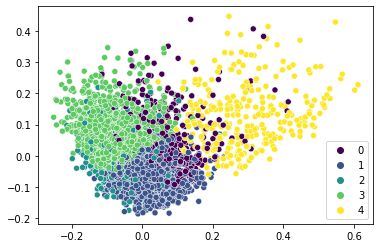

In [1272]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [1273]:
%%time
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowTFIDF )
mds.shape

CPU times: user 11min 41s, sys: 7min 15s, total: 18min 56s
Wall time: 8min 20s


(5000, 2)

In [1274]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

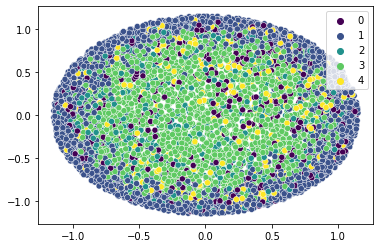

In [1275]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### TSNE

In [1276]:
%%time
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowTFIDF )
tsne.shape

CPU times: user 1min 24s, sys: 728 ms, total: 1min 25s
Wall time: 22.2 s


(5000, 2)

In [1277]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

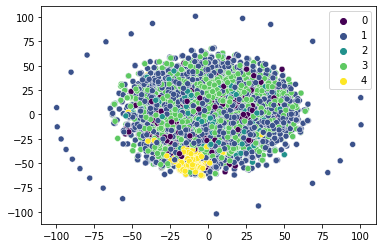

In [1278]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [1279]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_tfidf - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
37566,8547000240,R1ZU42R73DOYJP,2,o livro veio com algumas páginas coladas tive ...,2,1,0
167003,8535932879,RVDJIQWXWMQ1Z,5,muito bom livro que deixa com aquela sensação ...,0,3,0
62035,8546501459,RFWT8W4B9FN3C,5,escolhi essa classificação porque gostei muito...,2,4,0
118748,8532530788,R1N4OVPEFRMX69,5,eu achei muito bom para ler e aprender palavra...,0,2,0
129906,8501105732,R2GBLW0IFATBFP,5,esse livro muito muito bom mesmo,0,3,0
111150,8542209826,R10F2RZIJ1UE21,1,não sabia que a história é muito triste,2,0,0
165499,8594541473,R360BPNJ4ZCUFN,3,talvez eu tenha tido uma expectativa muito gra...,0,3,0
170987,8565765695,RARISMI724L44,4,o livro é lindo to muito apaixonada,2,3,0
138128,8565765482,RA7JRLS33IXO5,5,gostei muito da história e me surpreendi fique...,0,2,0
137921,8565765482,R3D5VKPRAGH8FR,5,o livro tem uma escrita leve e fluída gostei m...,2,1,0



Sentences by score from class 0
5    356
4     43
3     21
2      7
1     10
Name: review_rating, dtype: int64

Examples from class 0

amei o produto veio maravilhoso espero que seja bom tbm chegou antes do praso o cheiro é muito bom cheiro de novo a história é pfta

-----------------------------------

mas a ideia e o conceito geral do livro são muito bons

-----------------------------------

livro muito bom para quem está começando no mundos dos investimentos

-----------------------------------

é muito marketing para os americanos

-----------------------------------

é muito prolixo

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 1



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
86570,8532606261,R6ZEEA8835J0W,4,bons terapeutas provavelmente se depararão com...,3,4,1
25139,8595083274,R120V6YYVG6GLH,5,sobre os investimentos,2,0,1
44040,8501117684,R1QI89Y99VTTBG,5,coho é uma autora incrível uma das minhas pref...,0,1,1
55331,8595084742,RY4HYVL4P382G,1,veio sem o pôster,2,0,1
145568,8576849941,R2SK1RCD7T0484,5,esse livro pode mudar sua vida se vc realmente...,0,3,1
8510,8501112518,R1DBCB95N8BTS8,5,sensacionalsem dúvidas é meu livro favorito a ...,2,3,1
19671,8584391509,R16SYQ1UPLST29,5,final surpreendente e história cativante,0,2,1
161458,8532649963,RCJQPAPOV9U7L,5,com uma leitura complexa han nos acompanha a r...,2,1,1
81618,8575422391,R16VEHKUW7HVBF,5,esse livro minha vida de verdade,0,3,1
8790,8550802751,R3LMQA5T25RY1T,2,mais um sucesso do marketing editorial,0,2,1



Sentences by score from class 1
5    1722
4     235
3      91
2      59
1      83
Name: review_rating, dtype: int64

Examples from class 1

e seus pequenos erros dão pra relevar

-----------------------------------

a diagramação é muitoo boa e confortável com folhas amareladas e acompanhado de um marca página lindo

-----------------------------------

deveria ser uma leitura obrigatória para toda e qualquer pessoa

-----------------------------------

leitura simples e genial

-----------------------------------

milagre da manhã nos faz pensar justamente por outra perspectiva

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 2



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
17624,8584391509,R1OEPKNNPF9SP6,5,quando eu li o título e vi que ela se casou v...,2,1,2
40685,8543104335,R1MJWGW91ASSOY,5,não li nem conheço o autor,2,0,2
173803,8573020806,R3KT2EI8HK6L58,5,li e reli,0,2,2
73007,8555340896,RBA7645O4QO9F,5,quando li me vi na alya porque passei pela mes...,2,0,2
13886,8568014003,R3ODCFZJHNSZQH,5,levoume a muda a visão que antes possuía sobre...,2,0,2
5945,8501112518,R1VC7XKI2QWTPS,5,arrisco dizer que é um dos melhores livros que...,0,2,2
136854,8565765482,R23QOPHG1P01XY,3,já li por indicação desses jovens a saga crepú...,4,1,2
73179,8555340896,R3P17YXAXAB3R9,5,adorei a leitura não conseguia parar de ler po...,4,0,2
157764,6558380544,R3JA1CAKU6HX1M,5,li em dias mas a vontade é de ler sem parar,2,0,2
143976,8576849941,R256OCDUDK4XAT,5,mesmo que você não faça o desafio proposto pel...,2,4,2



Sentences by score from class 2
5    324
4     45
3     14
2     14
1      9
Name: review_rating, dtype: int64

Examples from class 2

super recomendo já quero começar a ler os próximos livros

-----------------------------------

queria muito ler esse livro mas ele não veio

-----------------------------------

sou fã do filme e estou amando ler o livro

-----------------------------------

os sete maridos de evelyn hugo é um dos livros mais maravilhosos que já li

-----------------------------------

deu pra ler em um dia

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 3



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
35987,8547000240,R1QH45WN6GY79A,5,a autora nos fornece experimentos da mentalida...,4,1,3
161146,8532649963,R2SUMXEOQQJL3T,3,eu como leitor casual demorei mais do que eu e...,2,3,3
84706,8543102146,RWUR4W85THHJB,5,para quem está buscando uma vida menos ocupada...,2,1,3
114854,8582892101,RGJUVRYAAMFS2,5,gostei bastante do livro o fundamento está em ...,4,4,3
84163,8543102146,R1UFNJ4VNE3VVX,5,para quem está perdido nesse mundo tão trivial...,2,1,3
47488,8539004119,R8SIGROKLUZGX,5,esclarece pontos relevantes sobre nossos hábit...,2,1,3
12357,8568014003,R3R290G8Q4M0JJ,5,lições poderosas e muitas vezes óbvias mas é o...,2,1,3
7266,8501112518,R2A1PVKFU667B2,5,enfim um livro para que você saia da sua zona ...,3,4,3
29850,8584440739,R2MUH7GN8LN5HP,5,livro excelente esclarecedor ajuda os pais a c...,4,3,3
12047,8568014003,R3OQ15HI5XCY23,3,porém o livro é escrito em fora de um interrog...,4,4,3



Sentences by score from class 3
5    1163
4     253
3     130
2      44
1      71
Name: review_rating, dtype: int64

Examples from class 3

o que ela não consegue entender é por que a mãe nunca falou de seu pai ainda mais agora que ele parece ser uma cara legal

-----------------------------------

acho evelyn hugo uma mulher interessantíssima parece ser uma biografia real e ter uma protagonista nada clichê  trazer o lado nada glamoroso da fama falar sobre amor verdadeiro  foi um acerto da autora porém apesar de tocar em temas importantes senti falta da profundidade ao abordálos da grande reviravolta da ambientação mais detalhada fazendo a referência a músicas ou sucessos da época devido ao hype esperava mais da obra mas foi uma leitura diferente e interessante

-----------------------------------

livro excelente amplia a visão que temos do dinheiro e nos ajuda a cuidar e multiplicar o que temos mesmo sendo pouco  recomendo demais a leitura

-----------------------------------

não t

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
73535,8571832641,R2O02TCI08ETT4,5,a entrega foi super rápida e o os livro chegou...,4,1,4
32262,6580309318,R3FNZ2IZ9CU,5,o livro chegou amassado,2,3,4
24411,8595083274,R3FZSA993GGAOR,5,chegou antes do prazo previstoem perfeito estado,0,2,4
148194,8551002341,R3FIJ3PDLD84DH,5,amei muito veio super bem embalado e sem nenhu...,0,2,4
148003,8551002341,R3AFDGI5LLDR96,4,entregue no prazo e com muito cuidado,2,1,4
39260,8547000240,R1LUNJVOI7YLZP,4,chegou em ótimo estado recomendo,0,2,4
136179,8501304468,R2J3X53Q5FRQHA,3,o produto demorou mais que o normal a chegar e...,4,1,4
58772,8573258926,R1T9SPO4Q46HN,5,entrega super rápida e o livro chegou perfeitinho,2,1,4
124939,8551006754,RVNKQ07H1MNY6,5,muito rápido a entrega,2,0,4
85597,8543102146,R31Q6L257A98EO,5,boa entrega e ótimo livro,0,2,4



Sentences by score from class 4
5    279
4     18
3      7
1      2
Name: review_rating, dtype: int64

Examples from class 4

o livro veio em perfeito estado e dentro do prazo

-----------------------------------

fiz o pedido dia  e hoje dia  que chegou dez dias adiantado estou muito feliz veio sem nenhum arranhão

-----------------------------------

livro acabou de chegar em casa

-----------------------------------

chegou muito antes do prazo estou amando

-----------------------------------

livro em ótimo estado entrega super rápida e vale super a pena

-----------------------------------

###########################################################################
###########################################################################
###########################################################################



## LDA - BoW - Sparse Matrix - Token Frequency

#### "By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight"
#### From: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [1280]:
# ldaPartialDf = [ str(sentence).encode("utf-8") for sentence in partialDf['sentence'] ]
# # ldaPartialDf = [ u''.join( str(sentence) ) for sentence in partialDf['sentence'] ]

# ldaPartialDf[ 0 ]

In [1281]:
# totalToShow = 10

# dictionary = Dictionary( sentence.split() for sentence in ldaPartialDf )

# print( f'>> First {totalToShow}th tokens' )
# print( '---------------------' )
# [print(dictionary[i]) for i in range(0, totalToShow)]

# print()
# print( f'>> Last {totalToShow}th tokens' )
# print( '---------------------' )
# [print(dictionary[i]) for i in range( len(dictionary)-totalToShow, len(dictionary) )]

In [1282]:
# print( f'Number of unique tokens: {len(dictionary)}')

In [1283]:
# print( type(dictionary) )

In [1284]:
# dataWords = [sentence.split() for sentence in ldaPartialDf]
# id2word = Dictionary( dataWords )
# corpus = [id2word.doc2bow(text) for text in dataWords]
# print(corpus[:1][0][:30])

In [1285]:
type( partialDf['sentence'].tolist() )

list

In [1286]:
# Based on 
# https://www.tutorialspoint.com/gensim/gensim_creating_a_bag_of_words_corpus.htm
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
doc_tokenized = [ simple_preprocess( str(sentence) ) for doc in partialDf['sentence'].tolist() ]
dictionary = Dictionary()
BoW_corpus = [ dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized ]
# print(BoW_corpus)

In [1287]:
id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
# print(id_words)

In [1288]:
lda_model = LdaModel(
    corpus=BoW_corpus,
    id2word=dictionary,
    num_topics=clustersTotal)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"pessoas" + 0.070*"que" + 0.070*"nos" + 0.047*"ensinar" + '
  '0.043*"importante" + 0.040*"ao" + 0.040*"lado" + 0.039*"aprender" + '
  '0.039*"acrescentar" + 0.039*"em"'),
 (1,
  '0.079*"nos" + 0.078*"que" + 0.070*"pessoas" + 0.042*"aperfeiçoar" + '
  '0.041*"tem" + 0.041*"estar" + 0.040*"devemos" + 0.039*"possuem" + '
  '0.039*"aprender" + 0.038*"importante"'),
 (2,
  '0.077*"pessoas" + 0.076*"que" + 0.074*"nos" + 0.042*"sempre" + '
  '0.041*"sabem" + 0.040*"mais" + 0.040*"com" + 0.040*"nossas" + 0.039*"algo" '
  '+ 0.039*"devemos"'),
 (3,
  '0.076*"pessoas" + 0.073*"nos" + 0.072*"que" + 0.043*"sempre" + 0.042*"algo" '
  '+ 0.041*"de" + 0.040*"ao" + 0.040*"conhecimento" + 0.039*"lado" + '
  '0.039*"em"'),
 (4,
  '0.095*"nos" + 0.082*"pessoas" + 0.057*"ao" + 0.051*"que" + 0.047*"sempre" + '
  '0.047*"importante" + 0.044*"nossas" + 0.043*"vidas" + 0.041*"acrescentar" + '
  '0.038*"em"')]
